In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy import integrate
import cgs as cgs
from scipy import interpolate
import dwarf_model as dw_model
from initial_conditions import ic_list as icl ;
from matplotlib import rc

using cgs py
Loading IC for  Leo_T_burkert
Loading IC for  Leo_T
MUST SET A 'potential_type'
Loading IC for  LT_n020_v2_nh5
If M200 or n_o are not set, they will be solved for
using the profile choice
NFW solve M200, R200, rho_s, r_s, c 6.15304635648e+41 4.22478106861e+22 1.69442491018e-24 2.4531136761e+21 17.2221169764
Loading IC for  LT_n020_v2_nh4
If M200 or n_o are not set, they will be solved for
using the profile choice
NFW solve M200, R200, rho_s, r_s, c 6.15304635648e+41 4.22478106861e+22 1.69442491018e-24 2.4531136761e+21 17.2221169764
Loading IC for  LT_n020_v2_nh3
If M200 or n_o are not set, they will be solved for
using the profile choice
NFW solve M200, R200, rho_s, r_s, c 6.15304635648e+41 4.22478106861e+22 1.69442491018e-24 2.4531136761e+21 17.2221169764
Loading IC for  Leo_T_obs
Assuming primordial neutral for dwarf mu = 1.31
Assuming primordial ionized for halo mu = 0.6
If M200 or n_o are not set, they will be solved for
using the profile choice
NFW solve M200, R200, r

In [34]:
simulation_dir = '/home/emerick/Research/dwarfs/flash_runs/leo_T/'
model_name = "LT_n075_v4_nh4"
sim_mass   = model_name + '_cont_mass_1-0.dat'

In [35]:
initial_conditions = icl.ic_object_dict[model_name.replace('v4','v2')]
print model_name

LT_n075_v4_nh4


In [36]:
anal_model = dw_model.analytical_dwarf(model_name, initial_conditions.ic)

In [37]:
anal_model.load_simulation_mass(simulation_dir +model_name +'/' + sim_mass)

In [38]:
if 'v4' in model_name:
    velocity = 400.0E5
elif 'v2' in model_name:
    velocity = 200.0E5

anal_model.setup_orbit(0.0, initial_conditions.ic['n_halo'], velocity)

In [39]:
tmax = anal_model.simulation_data['time'][anal_model.simulation_data['mass'] == 0.0][5]
print tmax

1370.02252


(0, 200)

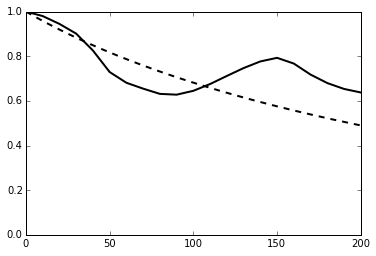

In [40]:
fig = plt.figure()
ax = fig.add_subplot(111)

# desired timestep size and start / end times... in Myr
dt = 0.5
tmin = 0.0

npoints = np.ceil((tmax - tmin)/dt)

t = np.linspace(tmin, tmax, npoints)*cgs.Myr

shock_kwargs = {'RPS':{'alpha': 3.1111,'beta': 0.7500,'method':'shock'},'KH':{'beta': 6.}}

M , R = anal_model.evolve(t, ['RPS','KH'], RPS_KH_exclusive = True, physics_kwargs=shock_kwargs)

ax.plot(anal_model.simulation_data['time'], anal_model.simulation_data['mass']/anal_model.simulation_data['mass'][0], label='9pc Sim', color='black',ls='-',lw=2)
#ax.plot(LT_n075_v2_nh3_cont['t'], LT_n075_v2_nh3_cont['m']/LT_n075_v2_nh3_cont['m'][0], label='9pc Sim - Cont', color='black',ls=':',lw=2)
ax.plot(t/cgs.Myr, M/M[0], label = 'Analytic', color='black',ls='--',lw=2)


plt.xlim(0,tmax)
plt.xlim(0,200)

In [9]:
# KY stripping timescale:
F = initial_conditions.ic['M_HI'] / (initial_conditions.ic['M_HI'] + initial_conditions.ic['M_DM'])
M_o = initial_conditions.ic['M_DM'] / cgs.Msun
n_h = initial_conditions.ic['n_halo']

tau_KH = 2.19E9*(F/0.1) * (M_o / 1.0E9)**(1.0/7.0) * (n_h / 1.0E-4)**(-1.0) * (velocity/1.0E8)**(-1)

print tau_KH, tau_KH/1.0E6

853021121.995 853.021121995


In [10]:
initial_conditions.ic

{'M200': 6.153046356477917e+41,
 'M_DM': 1.452043e+40,
 'M_HI': 4.7171426023269098e+38,
 'R200': 4.224781068612719e+22,
 'RM': 9.257032740000001e+20,
 'T_dwarf': 6000.0,
 'T_halo': 1459890.2102356313,
 'b': 2.4531136761000005e+21,
 'c': 17.22211697637003,
 'mu_dwarf': 1.31,
 'mu_halo': 0.6,
 'n_halo': 0.0001,
 'n_o': 0.75,
 'potential_type': 'NFW',
 'r_DM': 9.257032740000001e+20,
 'r_HI': 9.257032740000001e+20,
 'r_s': 2.4531136761000005e+21,
 'rho_crit': 9.74e-30,
 'v_halo': 20000000.0}

In [11]:
print 2.777E16 / cgs.Myr

879.997718407


In [12]:
M = (cgs.mp * 1.31 * 2. * (9.0 * cgs.pc)**3)/cgs.Msun

In [13]:
print R

[  9.25703274e+20   9.23925896e+20   9.22157926e+20 ...,   9.39405896e+19
   9.38524052e+19   9.37642549e+19]


In [14]:
tau = anal_model.evaluate_KH_timescale()

In [15]:
print tau / cgs.Myr

[ 853.95324528  854.36516583  854.77353174 ...,  277.68509901  277.42213577
  277.15921481]


(0, 1370.02252)

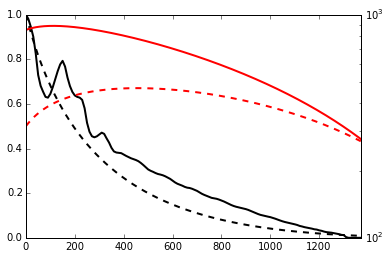

In [21]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(anal_model.simulation_data['time'], anal_model.simulation_data['mass']/anal_model.simulation_data['mass'][0], label='9pc Sim', color='black',ls='-',lw=2)
#ax.plot(LT_n075_v2_nh3_cont['t'], LT_n075_v2_nh3_cont['m']/LT_n075_v2_nh3_cont['m'][0], label='9pc Sim - Cont', color='black',ls=':',lw=2)
ax.plot(anal_model.t/cgs.Myr, anal_model.M/anal_model.M[0], label = 'Analytic', color='black',ls='--',lw=2)

cs_KH = dw_model.KH_timescale(anal_model.M, anal_model.R, anal_model.ic['n_halo']*cgs.mp*anal_model.ic['mu_halo'],
                        400.0E5, anal_model.ic['T_halo'], anal_model.ic['T_dwarf'])


ax2 = ax.twinx()
ax2.plot(t/cgs.Myr, anal_model.KH_timescale/cgs.Myr, color='red',lw=2,ls='-')
ax2.plot(anal_model.t/cgs.Myr, cs_KH/cgs.Myr / 100.0,color='red',lw=2,ls='--')
ax2.semilogy()
ax.set_xlim(0,tmax)
